<a href="https://colab.research.google.com/github/Piyaphum/Weather-Prediction/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/kongruksiamza/MachineLearning/refs/heads/master/Linear%20Regression/Weather.csv')
df.head()

<ipython-input-35-ee75373cedf6>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/kongruksiamza/MachineLearning/refs/heads/master/Linear%20Regression/Weather.csv')


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


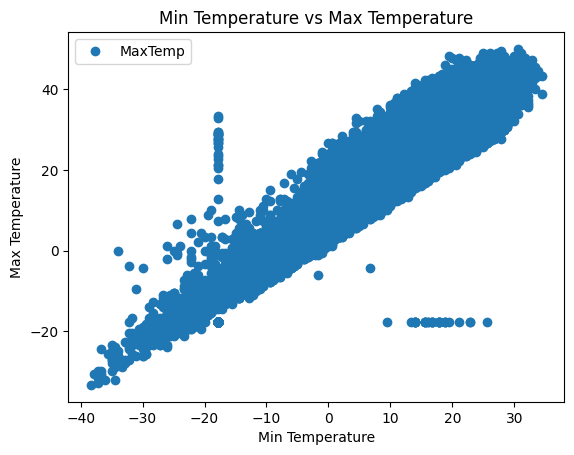

In [36]:
df.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('Min Temperature vs Max Temperature')
plt.xlabel('Min Temperature')
plt.ylabel('Max Temperature')
plt.show()

**Data Preprocessing ทำการเปลี่ยนข้อมูลเป็น array 2D ก่อน แล้วก็แบ่งข้อมูลเป็น 2 ส่วนคือ training set และ test set**

In [37]:
x = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values.reshape(-1,1)

In [38]:
# แบ่งเป็น 80, 20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

**เริ่ม Train Model**

In [39]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

**Test the Data**

In [40]:
y_pred = model.predict(x_test)

**สร้างเส้น Linear Regression หรือเส้น Hyperplane ขึ้นมา**

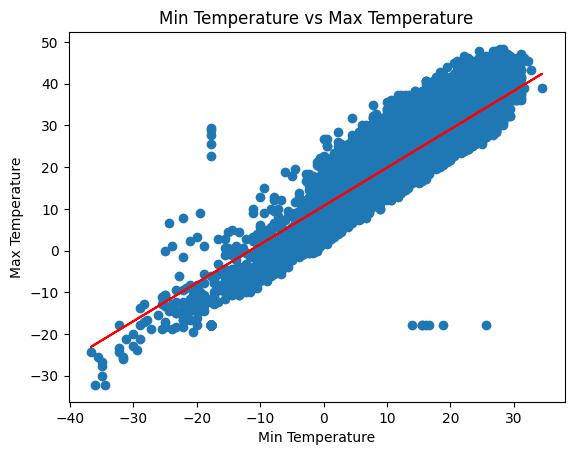

In [41]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.title('Min Temperature vs Max Temperature')
plt.xlabel('Min Temperature')
plt.ylabel('Max Temperature')
plt.show()

**เปรียบเทียบ ข้อมูลจริง กับ ข้อมูลที่ทำนาย**

In [42]:
df = pd.DataFrame({'Actually': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actually,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852


**Evaluation -> MAE -> MSE -> RMSE**

In [51]:
y_test = np.nan_to_num(y_test)  # แทนค่าว่างด้วย 0
y_pred = np.nan_to_num(y_pred)  # แทนค่าว่างด้วย 0

print(f'Mean Absolute Error : {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Square Error : {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Square {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')  #หาว่า y_pred ต่างจาก y_test เท่าไหร่ ยิ่งค่าใกล้ 0 ยิ่ง error น้อย

Mean Absolute Error : 3.19932917837853
Mean Square Error : 17.631568097568447
Root Mean Square 4.198996082109204


In [49]:
print(f'Score : {metrics.r2_score(y_test, y_pred) * 100:.2f}%')

Score : 76.70%
